### AUTHOR: VAISHNAV KRISHNA P
### INTERNSHIP: INTERNPE
### TITLE : IPL WINNING TEAM PREDICTION

In [465]:
# Importing the necessory libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Ignoring the warnings
import warnings
warnings.filterwarnings(action="ignore")

# importing Labelencode 
from sklearn.preprocessing import LabelEncoder

# importing models for cress validation scaore training 
from sklearn.model_selection import KFold,cross_val_score,train_test_split

# Importing various classification prediction models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# for Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [466]:
# Loading the dataset 
df = pd.read_csv("matches.csv")
data = df.copy()

In [467]:
# First five dataset 
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [468]:
df.shape

(756, 18)

### EDA 
1. MISSING VALUE ANALYSIS 
2. NUMERICAL FEATURES 
3. CATEGORICAL FEATURES 
4. VISUALISATION
5. CORELATION ANALYSIS 
6. NOISE DETECTION
7. CHECKING THE DUPLICATES

### MISSING VALUE ANALYSIS 

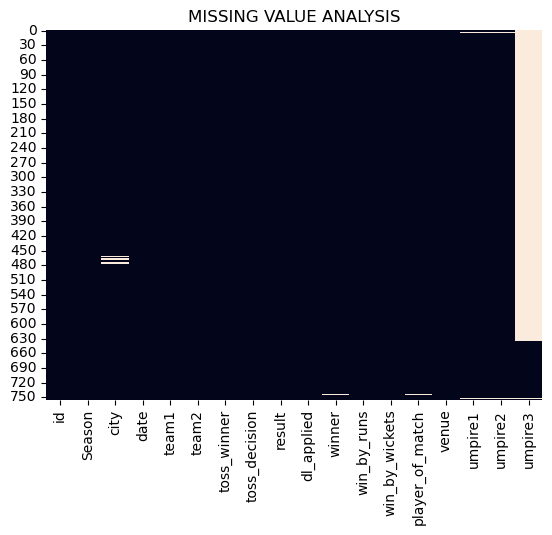

In [469]:
# lets visulaise the missing value analysis 
plt.title("MISSING VALUE ANALYSIS")
sns.heatmap(df.isnull(),cbar=False)
plt.show()

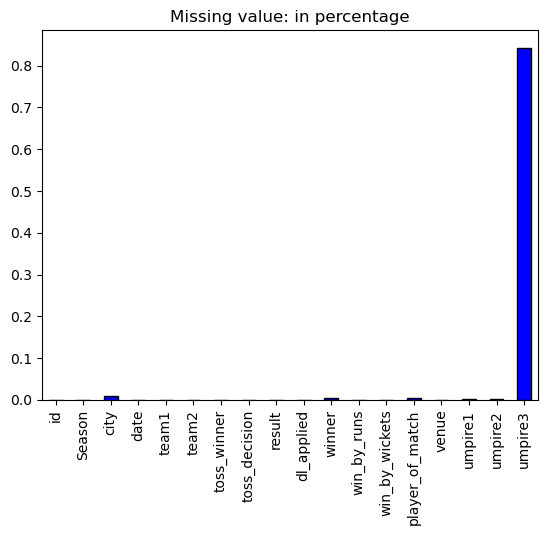

In [470]:
# Missing value percentage 
plt.title("Missing value: in percentage")
(df.isna().sum()/len(df)).plot(kind="bar",color="b",edgecolor="k")
plt.show()

* From the missing value analysis, It is understandable that except for the feature umpire3 all the columns are almost clean
* will remove the umpire3 feature in the lateron step since more than 80% of the features are missing

In [471]:
# features with missing values 
missing_value_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
missing_value_features

['city', 'winner', 'player_of_match', 'umpire1', 'umpire2', 'umpire3']

In [472]:
# No of missing values for each missing value features 
for feature in missing_value_features:
    print("{}:No of Missing value {}".format(feature, df[feature].isnull().sum()))

city:No of Missing value 7
winner:No of Missing value 4
player_of_match:No of Missing value 4
umpire1:No of Missing value 2
umpire2:No of Missing value 2
umpire3:No of Missing value 637


* Missing value analysis is over 

### CHECKING THE DUPLCATE VALUES 

In [473]:
df.duplicated().sum()

0

### NOISE DETECTION

In [474]:
# information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [475]:
# description about the dataset of Numerical features 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [476]:
df["date"] = pd.to_datetime(df["date"])

#### NUMARICAL FEATURES AND CATEGORICAL FEATURES

In [477]:
Numerical_features = [feature for feature in df.columns if df[feature].dtype == "int64"]
Categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
Temporal_features = [feature for feature in df.columns if df[feature].dtype == "datetime64[ns]"]

In [478]:
# Numerical features 
Numerical_features

['id', 'dl_applied', 'win_by_runs', 'win_by_wickets']

In [479]:
# Categorical features 
Categorical_features

['Season',
 'city',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [480]:
# Tempral features 
Temporal_features

['date']

In [481]:
# No of unique values in each features 
df[Numerical_features].nunique()

id                756
dl_applied          2
win_by_runs        89
win_by_wickets     11
dtype: int64

In [482]:
# So, the win_by_wickets and dl_applied is categorical features 
Numerical_features = ["win_by_runs"]
Categorical_features.extend(["dl_applied","win_by_wickets"])

### VISULISATION OF CONTINOUS FEATURES

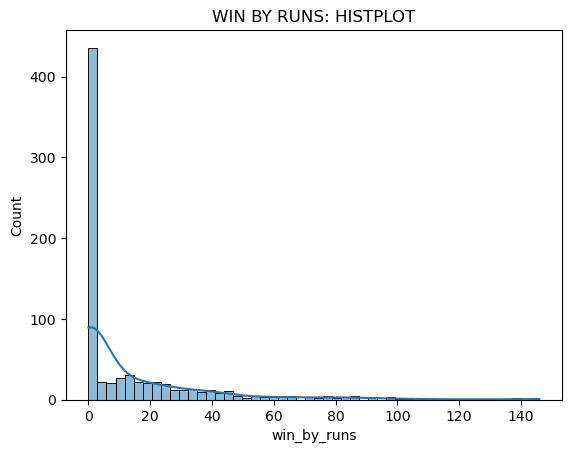

In [483]:
plt.title("WIN BY RUNS: HISTPLOT")
sns.histplot(data=df,x="win_by_runs",kde=True,bins=50)
plt.show()

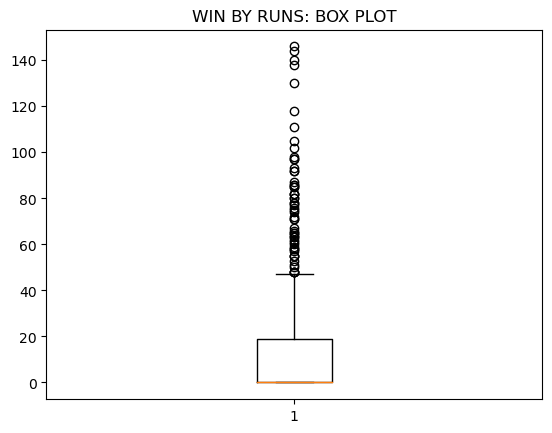

In [484]:
plt.title("WIN BY RUNS: BOX PLOT")
plt.boxplot(x="win_by_runs",data=df) 
plt.show()

* There are larget number of outlier and it is a skewed distribution

### VISULASATION OF CATEGORICAL FEATURES

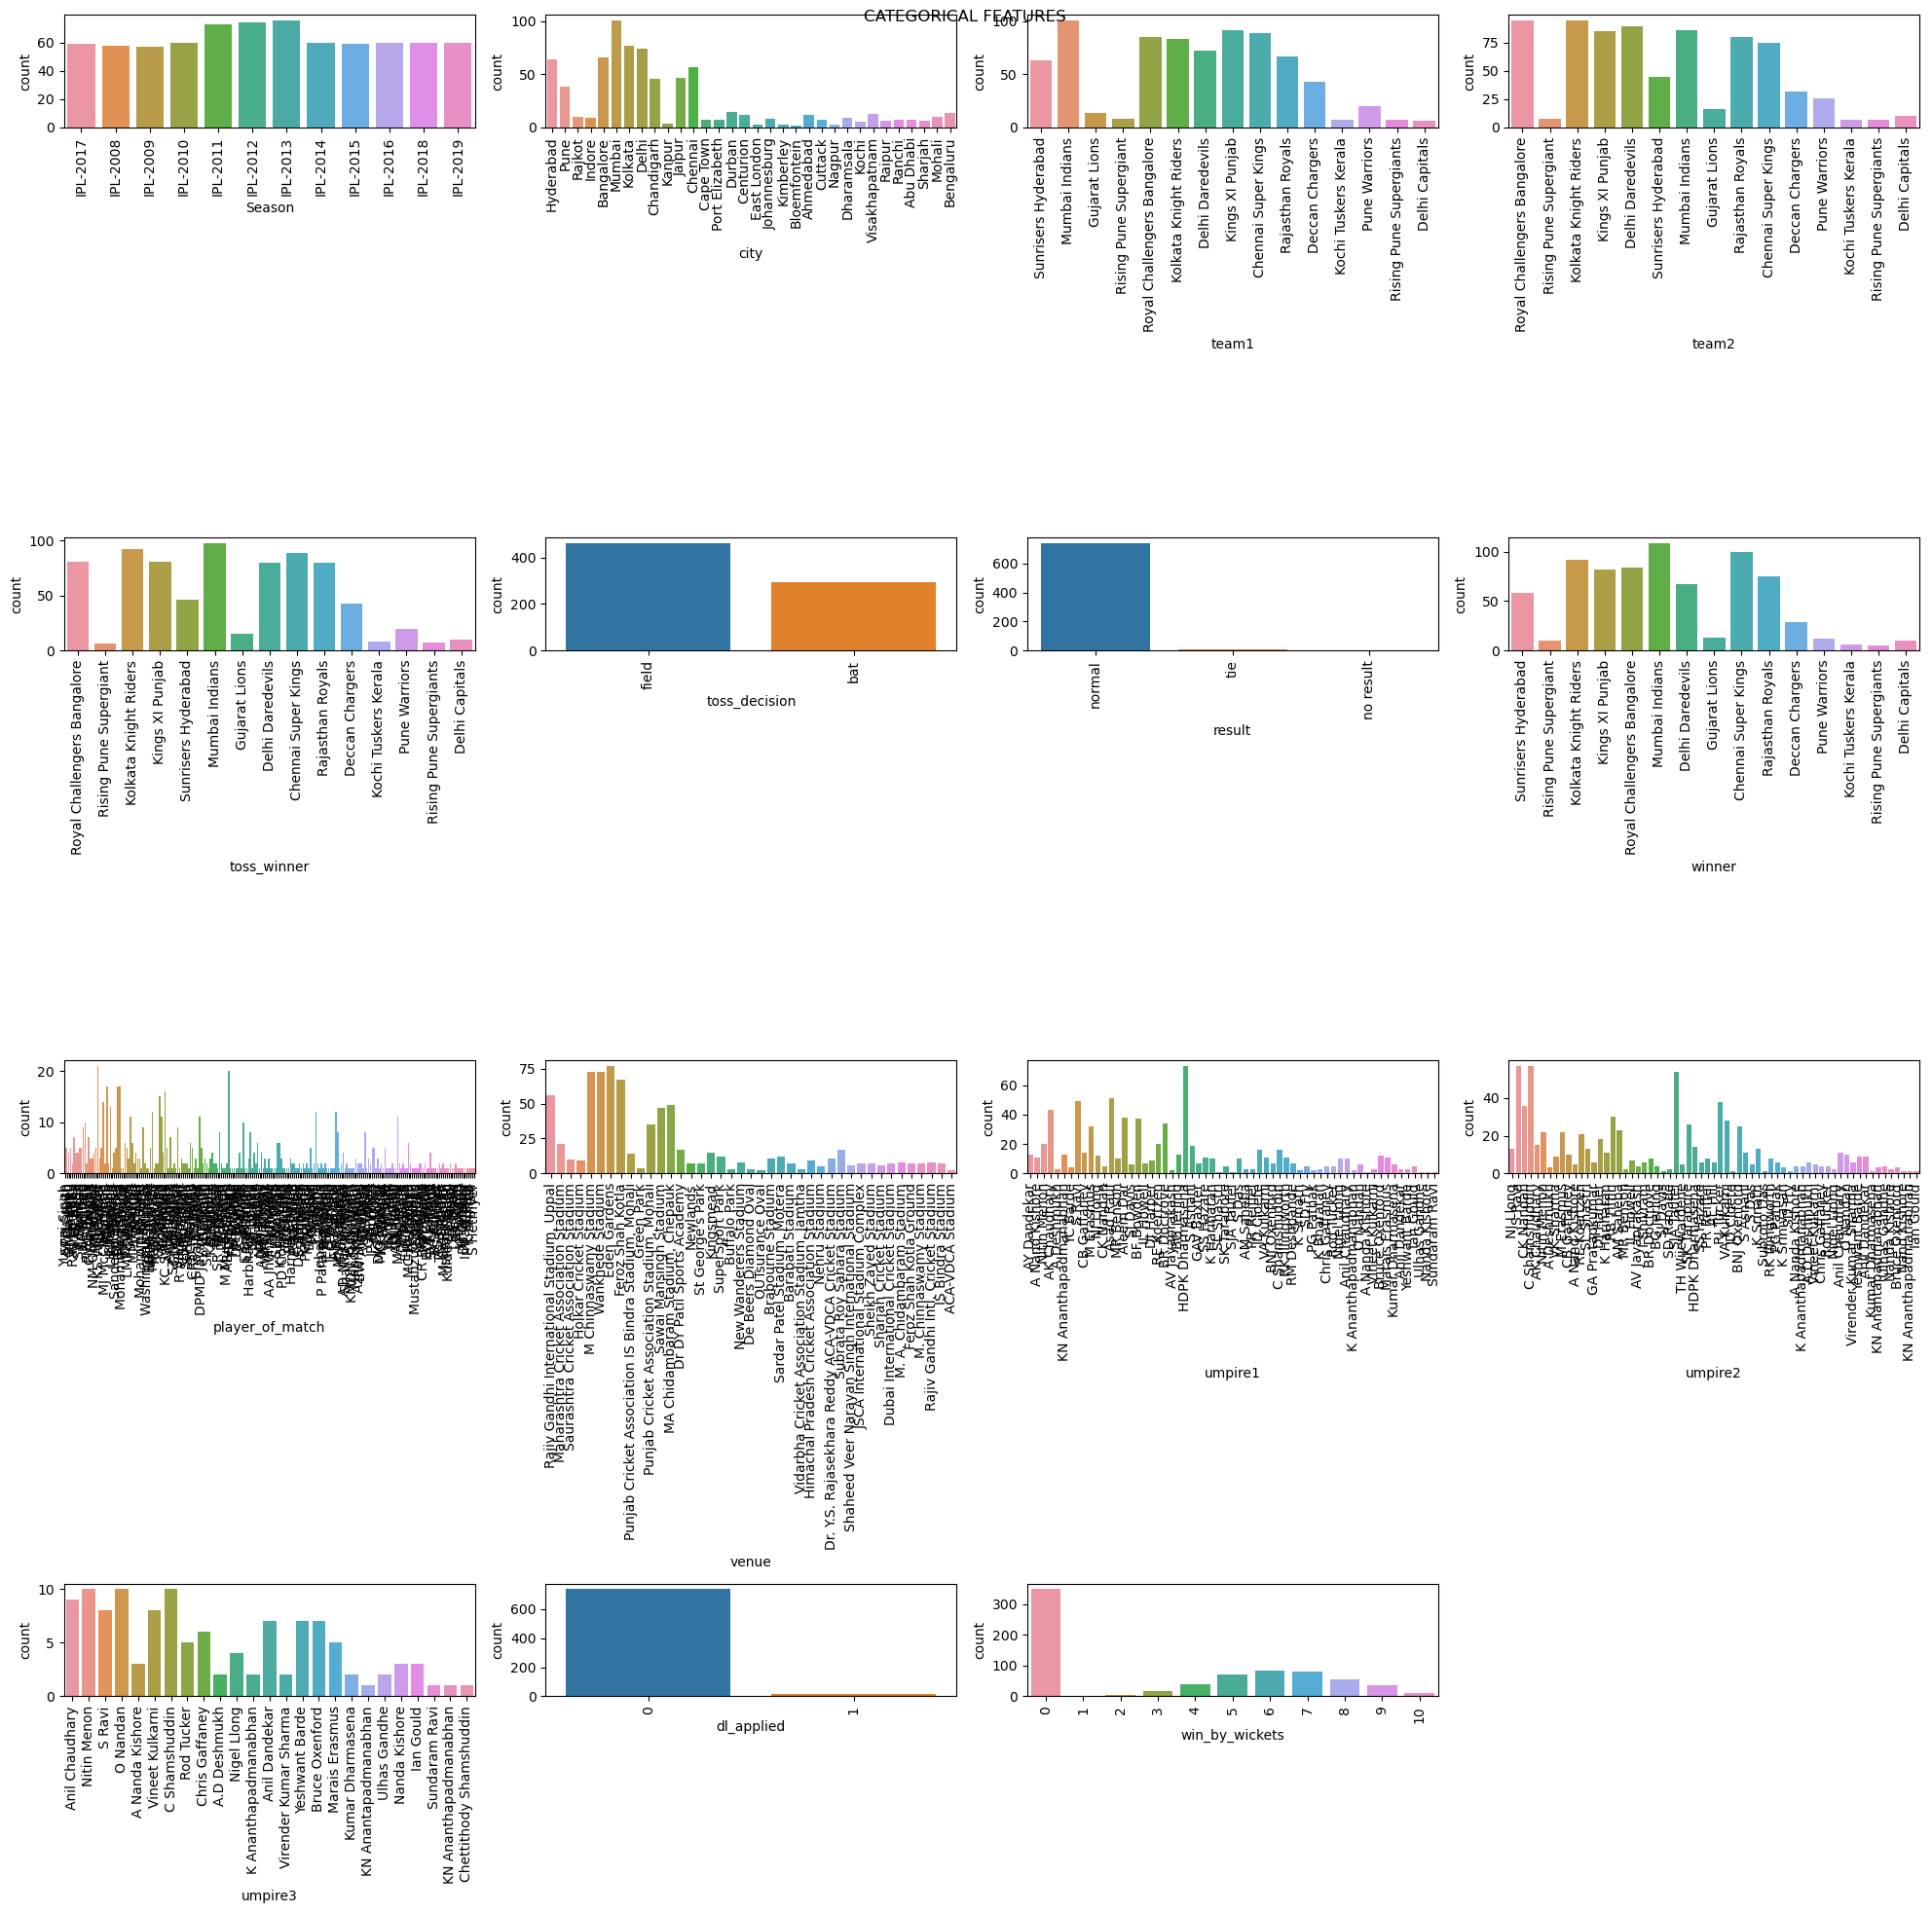

In [485]:
c = 1
plt.figure(figsize=(20,20))
plt.suptitle("CATEGORICAL FEATURES")
for feature in Categorical_features:
    plt.subplot(4,4,c)
    c += 1
    sns.countplot(x=feature,data = df)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [486]:
df["dl_applied"].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

In [487]:
# No of unique values in the player of the match 
df["player_of_match"].nunique()

226

In [488]:
# Value count of result
df["result"].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

* Since the feature dl_applied,result is very imbalaced will remove to avoid the noise 
* Player of the match have 226 unique values 
* will remove the date feature since the season feature have year details

### DATA CLEANING 

In [489]:
# Missing value features
missing_value_features

['city', 'winner', 'player_of_match', 'umpire1', 'umpire2', 'umpire3']

In [490]:
for feature in missing_value_features:
    if feature != 'umpire3':
        df[feature].fillna(df[feature].value_counts().index[0],inplace=True)

In [491]:
# Removing the unnecessory features 
features_to_remove = ["id","umpire3","result","dl_applied","player_of_match","date","win_by_wickets","city","umpire1","umpire2","venue"]
df.drop(columns=features_to_remove,inplace=True)

In [492]:
# Data cleaning 
df["Season"] = df["Season"].apply(lambda x:x.replace("IPL-",""))
df["Season"] = df["Season"].astype("int64")

### Feature transfomation

In [493]:
encoder = LabelEncoder()

for feature in df.columns:
    if df[feature].dtype == "O" and feature != "winner":
        df[feature] = encoder.fit_transform(df[feature])

In [494]:
n = 0
dict_winner = dict()

for value in df['winner']:
    if value not in dict_winner:
        dict_winner[value] = n
        n += 1
dict_winner

{'Sunrisers Hyderabad': 0,
 'Rising Pune Supergiant': 1,
 'Kolkata Knight Riders': 2,
 'Kings XI Punjab': 3,
 'Royal Challengers Bangalore': 4,
 'Mumbai Indians': 5,
 'Delhi Daredevils': 6,
 'Gujarat Lions': 7,
 'Chennai Super Kings': 8,
 'Rajasthan Royals': 9,
 'Deccan Chargers': 10,
 'Pune Warriors': 11,
 'Kochi Tuskers Kerala': 12,
 'Rising Pune Supergiants': 13,
 'Delhi Capitals': 14}

In [495]:
df["winner"] = df["winner"].map(dict_winner)

### CORELATION MATRIX

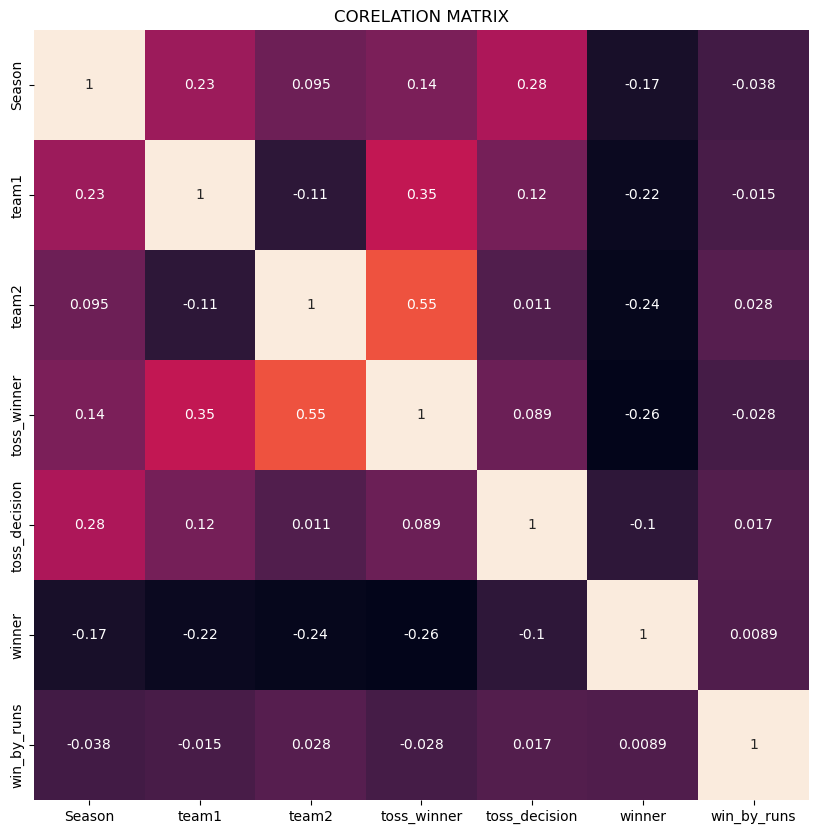

In [496]:
plt.figure(figsize=(10,10))
plt.title("CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

### SPOT CHECKING

In [497]:
model_list = ["LogisticRegression","SVC","KNN","DTC","RFC"]
results = []
no_s = 10
kfold = KFold(n_splits=no_s)
X = df.drop(columns="winner")
y = df["winner"]

# Training using Logistic Regression
model = LogisticRegression()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Training using Support vector Michine
model = SVC()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# K neighbors classifier 
model = KNeighborsClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Using Decision Tree classifier
model = DecisionTreeClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

# Random Forst classifier
model = RandomForestClassifier()
accuracy_list = cross_val_score(model,X,y,cv=kfold)
results.append(accuracy_list.mean())

results

[0.23278947368421052,
 0.1494736842105263,
 0.47619298245614045,
 0.8715263157894737,
 0.8279298245614036]

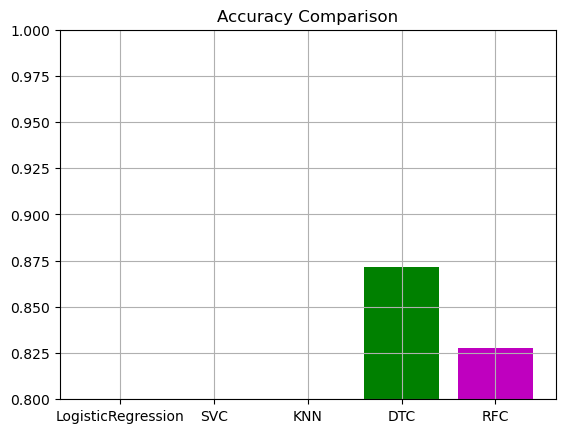

In [498]:
plt.title("Accuracy Comparison")
plt.bar(model_list,results,color=["r","k","pink","g","m"])
plt.ylim(0.8,1.0)
plt.grid(True)
plt.show()

### TRAIN TEST SPLIT

In [499]:
# Splitting the dataset into train test split
test_size = 0.2
seed = 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,shuffle=True,random_state=seed)

In [500]:
# splitting the dataset 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((604, 6), (152, 6), (604,), (152,))

### CREATING A MODEL 

In [501]:
# Training of the model using RFC
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

### TESTING THE MODEL

In [502]:
y_pred = model.predict(X_test)

print("Accuracy score: ",accuracy_score(y_pred,y_test))
print("Classification report:\n",classification_report(y_pred,y_test))

Accuracy score:  0.881578947368421
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      1.00      1.00         2
           2       0.95      0.88      0.91        24
           3       0.88      0.88      0.88        17
           4       1.00      0.80      0.89        15
           5       0.95      0.82      0.88        22
           6       0.78      1.00      0.88         7
           7       1.00      1.00      1.00         4
           8       0.85      1.00      0.92        22
           9       1.00      0.93      0.97        15
          10       1.00      1.00      1.00         7
          11       0.00      0.00      0.00         0
          13       0.67      0.50      0.57         4
          14       1.00      0.50      0.67         2

    accuracy                           0.88       152
   macro avg       0.84      0.79      0.81       152
weighted avg       0.

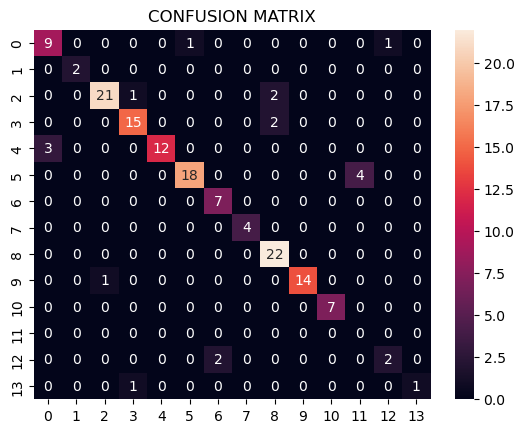

In [503]:
### CONFUSION MATRIX 
plt.title("CONFUSION MATRIX")
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.show()

### CHECKING OUR MODEL BY TAKING AN EXAMPLE

In [511]:
df.iloc[235]

Season           2011
team1               1
team2              10
toss_winner        10
toss_decision       1
winner              9
win_by_runs         0
Name: 235, dtype: int64

In [515]:
model.predict([[2011,1,10,10,1,0]])

array([9])

* Model has predicted correctly 
* Completed the project with 88.15% accuracy